In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/fikrialnfjr/forecast-arima/main/Kelembapan.csv')
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df = df.rename(columns={'Kelembapan Rata-rata (%)': 'Kelembapan'})
df.set_index('Tanggal', inplace=True)
df

,Kelembapan
Tanggal,
2005-01-01,80
2005-01-02,74
2005-01-03,79
2005-01-04,82
2005-01-05,86
...,...
2007-09-26,60
2007-09-27,60
2007-09-28,62


# Plot Data

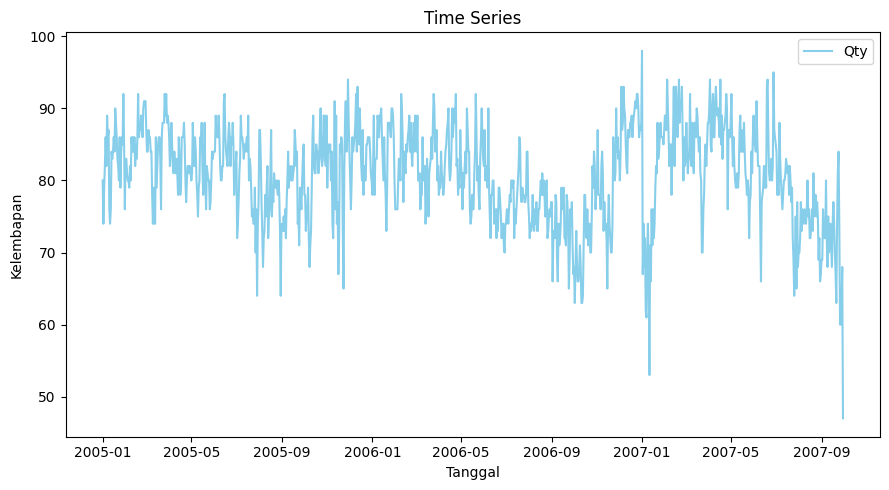

In [ ]:
fig, ax = plt.subplots(figsize=(9, 5))
plt.plot(df.index, df, color='skyblue', label='Qty')
plt.xlabel('Tanggal')
plt.ylabel('Kelembapan')
plt.title('Time Series')
plt.legend()
plt.tight_layout()
plt.show()

Dapat dilihat pada plot tersebut, pada tahun 2007 seperti terdapat trend menurun. Namun, hal itu masih belum dapat dipastikan apakah itu sebuah trend atau bukan. Oleh karena itu, kita akan melakukan pengecekan apakah data tersebut stasioner atau tidak.

# Uji ADF

In [ ]:
result = adfuller(df)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

if result[1] <= 0.05:
  print("\nThe data is stationary")
else:
  print("\nThe data is non-stationary")


ADF Statistic: -3.8205635187467775
p-value: 0.0027037932062446883
Critical Values:
	1%: -3.436979275944879
	5%: -2.8644668170148058
	10%: -2.5683283824496153

The data is stationary


Berdasarkan hasil uji ADF tersebut, didapatkan bahwa p-value lebih kecil dari alpha (0.05) yang berarti bahwa data tersebut stasioner. Dapat kita lihat juga pada nilai kritisnya, dimana didapatkan hasil ADF statistik nya lebih kecil dari semua nilai kritis pada taraf 1%, 5%, dan 10%. Sehingga dapat disimpulkan bahwa tolak H0, yang berarti bahwa data tersebut stasioner. Dikarenakan data yang kita gunakan stasioner, maka kita tidak memerlukan adanya differencing atau dengan kata lain nilai d = 0.

# Plot ACF & PACF
$\mathrm{ACF} = \rho_k = \frac{\sum_{t=k+1}^{n}(y_t - \bar{y})(y_{t-k} - \bar{y})}{\sum_{t=1}^{n}(y_t - \bar{y})^2}$

$\mathrm{PACF} = \phi_{k,k} = \frac{\gamma_k}{\sqrt{\gamma_0 \gamma_{k,k}}}$

<Figure size 1200x600 with 0 Axes>

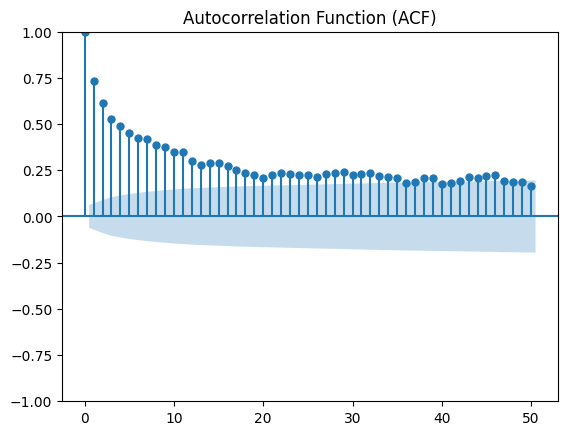

<Figure size 1200x600 with 0 Axes>

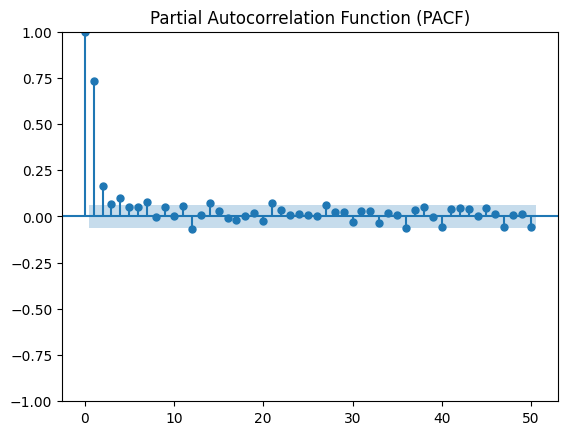

In [ ]:
# Plot ACF
plt.figure(figsize=(12, 6))
plot_acf(df, lags=50, alpha=0.05)
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(df, lags=50, alpha=0.05)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()


Dalam memilih lag berdasarkan plot ACF dan PACF, kita akan memilih lag dimana sebelum terjadinya cut-off.

Berikut ini adalah hasilnya :

PACF (AR) = 2, 4, 7, 12, 14, 21, 27, 36, 40

ACF (MA) = 35, 39, 46

# AIC

In [ ]:
import statsmodels.api as sm

p_values = [2, 4, 7, 12, 14, 21,27,36,40]
q_values = [35, 39, 46]

for p in p_values:
    for q in q_values:
        model = sm.tsa.ARIMA(df, order=(p, 0, q))
        model_fit = model.fit()
        aic = model_fit.aic
        print(f"ARIMA({p}, 0, {q}) - AIC: {aic}")


ARIMA(2, 0, 35) - AIC: 5793.6078803656565
ARIMA(2, 0, 39) - AIC: 5795.584423620918
ARIMA(2, 0, 46) - AIC: 5796.414079271826
ARIMA(4, 0, 35) - AIC: 5788.426430491753
ARIMA(4, 0, 39) - AIC: 5793.285885663245
ARIMA(4, 0, 46) - AIC: 5795.120775563073
ARIMA(7, 0, 35) - AIC: 5793.840830626809
ARIMA(7, 0, 39) - AIC: 5792.3027526263695
ARIMA(7, 0, 46) - AIC: 5799.959747161966
ARIMA(12, 0, 35) - AIC: 5785.567002747844
ARIMA(12, 0, 39) - AIC: 5791.0230880704985
ARIMA(12, 0, 46) - AIC: 5789.301772423138
ARIMA(14, 0, 35) - AIC: 5783.982444933431
ARIMA(14, 0, 39) - AIC: 5790.075749829677
ARIMA(14, 0, 46) - AIC: 5792.1375218466
ARIMA(21, 0, 35) - AIC: 5786.93358381119
ARIMA(21, 0, 39) - AIC: 5790.120753303585
ARIMA(21, 0, 46) - AIC: 5798.764929311348
ARIMA(27, 0, 35) - AIC: 5809.939278454052
ARIMA(27, 0, 39) - AIC: 5800.570309883273
ARIMA(27, 0, 46) - AIC: 5809.022664695244
ARIMA(36, 0, 35) - AIC: 5826.683193152513
ARIMA(36, 0, 39) - AIC: 5823.811374865511
ARIMA(36, 0, 46) - AIC: 5827.716543937453
A

Langkah selanjutnya adalah menentukan orde terbaik dengan melihat nilai AIC.

AIC (Akaike Information Criterion) merupakan metode yang digunakan untuk memilih model terbaik dari beberapa kombinasi model yang ada. Dari semua kombinasi model yang kami gunakan, didapatkan bahwa model ARIMA(14, 0, 35) memiliki nilai AIC yang paling rendah. Sehingga model terbaik yang digunakan adalah ARIMA(14, 0, 35).

# ARIMA Model
$Y_t=\psi_1 Y_{t-1} + \psi_2 Y_{t-2} + ... + \psi_p Y_{t-p} + \epsilon_t - \theta_1 \epsilon_{t-1} - \theta_2 \epsilon_{t-2} - ... - \theta_q \epsilon_{t-q}$

Pada library, tidak terdapat model ARMA secara spesifik. Sehingga untuk model yang dibangun tetap menggunakan model ARIMA, namun orde d nya adalah 0.

In [ ]:
# Model fitting
model = sm.tsa.ARIMA(df, order=(14, 0, 35))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             Kelembapan   No. Observations:                 1003
Model:               ARIMA(14, 0, 35)   Log Likelihood               -2840.991
Date:                Sun, 12 Nov 2023   AIC                           5783.982
Time:                        09:42:35   BIC                           6034.431
Sample:                    01-01-2005   HQIC                          5879.156
                         - 09-30-2007                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.7137      3.957     20.400      0.000      72.959      88.468
ar.L1          0.5189      2.617      0.198      0.843      -4.610       5.647
ar.L2         -0.1233      2.794     -0.044      0.9

# Predict

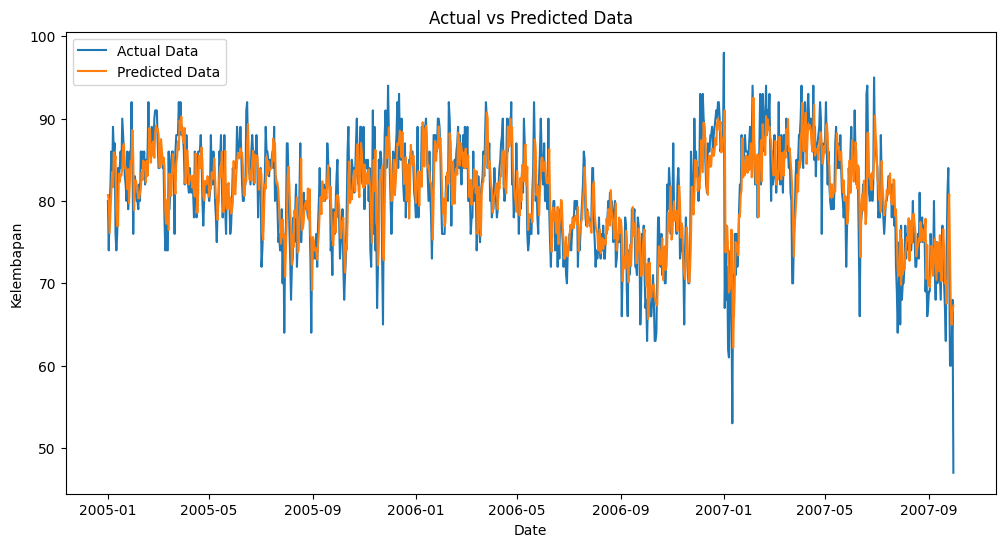

In [ ]:
# Predicting the data
start_index = df.index[0]
end_index = df.index[-1]
predicted_data = model_fit.predict(start=start_index, end=end_index)

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(df.index, df, label='Actual Data')
plt.plot(predicted_data.index, predicted_data, label='Predicted Data')
plt.title('Actual vs Predicted Data')
plt.xlabel('Date')
plt.ylabel('Kelembapan')
plt.legend()
plt.show()

Plot tersebut merupakan plot prediksi, dimana dengan menggunakan model ARIMA terbaik yang telah ditetapkan, dapat dilihat bahwa pola prediksi dapat mengikuti pola data aktual dengan baik.